### Initialize the environment

In [45]:
import theano
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
src_dir='../src' # source directory
run_dir_prefix='../MDBN_run/AML_Batch_' # directory with the results of previous runs
data_dir='../data' # directory with the data files

In [47]:
import sys
sys.path.insert(0, src_dir)
import MDBN
import main

### Load the experiment results

In [48]:
run=1
date_time='2017-02-20_2247' # specify the date and time of the run in the format YYYY-MM-DD_HHMM
run_dir=run_dir_prefix+date_time
runfile='Exp_%s_run_%s.npz' % (date_time, run) # location of the experiment results
config, dbn_dict = MDBN.load_network(runfile, run_dir)

### Configuration of the experiment

In [49]:
config

{u'dbns': {u'GE': {u'batchSize': 1,
   u'datafile': u'AML/AML_gene_expression_table2.csv.gz',
   u'epochs': [2, 800],
   'inputNodes': 19937,
   u'k': 1,
   u'lambdas': [0.0, 0.1],
   u'layersNodes': [400, 40],
   u'lr': [0.0005, 0.1],
   u'persistent': False},
  u'ME': {u'batchSize': 1,
   u'datafile': u'AML/AML_miRNA_Seq_table2.csv.gz',
   u'epochs': [2],
   'inputNodes': 559,
   u'k': 10,
   u'lambdas': [0.0, 0.1],
   u'layersNodes': [40],
   u'lr': [0.005],
   u'persistent': False},
  u'SM': {u'batchSize': 1,
   u'datafile': u'AML/AML_somatic_mutations_table2.csv.gz',
   u'epochs': [2, 800],
   'inputNodes': 1686,
   u'k': 1,
   u'lambdas': [0.0, 0.1],
   u'layersNodes': [200, 20],
   u'lr': [0.01, 0.1],
   u'persistent': False}},
 u'p': 0.5,
 u'pathways': [u'ME', u'GE', u'SM'],
 u'runs': 4,
 u'seed': 1234,
 u'top': {u'batchSize': 1,
  u'epochs': [800, 800],
  'inputNodes': 100,
  u'k': 1,
  u'layersNodes': [24, 3],
  u'lr': [0.1, 0.1],
  u'persistent': False},
 u'uuid': u'75ed0446

### Load the dataset and visualize the input of the pathways

In [50]:
datafiles = main.prepare_TCGA_datafiles("AML",config,data_dir)

### Look at the joint layer representation

In [51]:
dbn_output_list=[]
for key in config['pathways']:
    dbn_output, _ = dbn_dict[key].MLP_output_from_datafile(datafiles[key], datadir=data_dir)
    dbn_output_list.append(dbn_output)

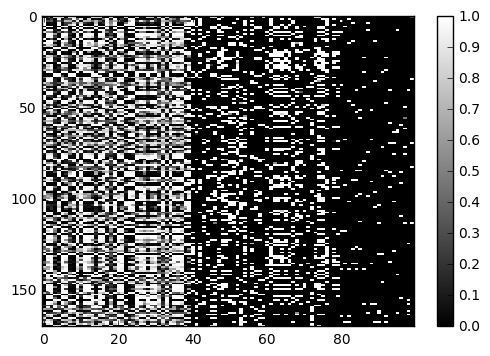

In [52]:
joint_layer = np.concatenate(dbn_output_list,axis=1)
plt.imshow(joint_layer, interpolation='none', cmap='gray')
plt.axis('tight')
plt.colorbar()

In [53]:
joint_layer[1:10,1:10]

array([[  5.97785451e-02,   2.46872574e-01,   3.78169934e-03,
          9.32798922e-01,   2.94584618e-03,   2.44243547e-01,
          2.70137846e-01,   9.53516722e-01,   3.76929015e-01],
       [  2.89844424e-01,   3.62659186e-01,   6.62332550e-02,
          4.37410593e-01,   1.51657328e-01,   7.20202386e-01,
          6.93177342e-01,   1.75869897e-01,   9.21278477e-01],
       [  1.88101064e-02,   6.44949451e-02,   1.98817458e-02,
          9.50377345e-01,   3.99791356e-03,   2.41382852e-01,
          2.66767383e-01,   7.89307058e-01,   2.14212090e-01],
       [  1.10575427e-04,   1.07620865e-04,   2.25991709e-03,
          9.99988914e-01,   9.49329547e-07,   1.96630180e-01,
          7.87676334e-01,   9.99984562e-01,   1.20028504e-03],
       [  9.86796916e-01,   9.98948991e-01,   4.36408333e-02,
          1.83392817e-03,   9.99398589e-01,   9.86616313e-01,
          3.33687551e-02,   2.14046871e-04,   9.98465121e-01],
       [  5.09102174e-05,   1.34028378e-04,   1.15752746e-05,
   

### Check the weights distributions

([array([  0.00000000e+00,   2.60000000e+01,   4.26000000e+02,
           2.84400000e+03,   6.91000000e+03,   6.48900000e+03,
           2.69400000e+03,   5.15000000e+02,   3.00000000e+01,
           3.00000000e+00]),
  array([  2.00000000e+00,   2.50000000e+01,   4.17000000e+02,
           2.56000000e+03,   6.67600000e+03,   6.84400000e+03,
           2.89300000e+03,   4.83000000e+02,   3.70000000e+01,
           0.00000000e+00]),
  array([    0.,    36.,   628.,  3629.,  7471.,  6042.,  1864.,   248.,
            19.,     0.]),
  array([    0.,    24.,   419.,  3148.,  7446.,  6687.,  2015.,   188.,
            10.,     0.]),
  array([  0.00000000e+00,   1.40000000e+01,   3.97000000e+02,
           3.24800000e+03,   8.01000000e+03,   6.32600000e+03,
           1.76700000e+03,   1.70000000e+02,   5.00000000e+00,
           0.00000000e+00]),
  array([  0.00000000e+00,   3.30000000e+01,   5.59000000e+02,
           3.54900000e+03,   7.66500000e+03,   6.16400000e+03,
           1.7600000

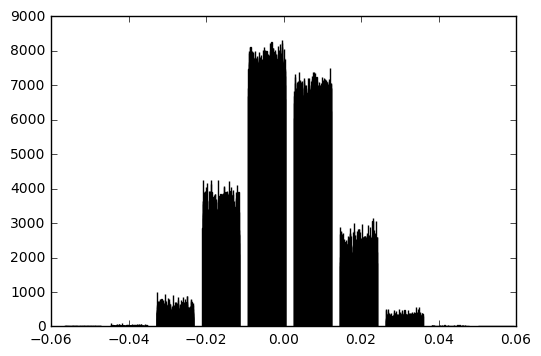

In [54]:
plt.hist(dbn_dict['GE'].rbm_layers[0].W.get_value())

### Check final results

([<matplotlib.axis.XTick at 0x14554eed0>,
 <a list of 3 Text xticklabel objects>)

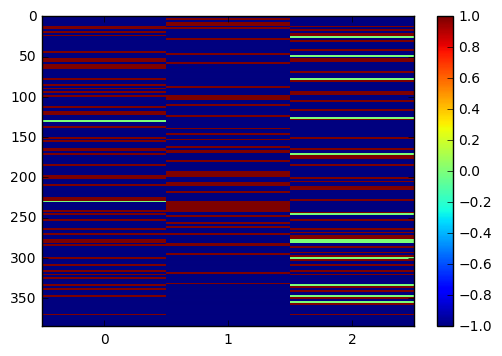

In [55]:
top_output = dbn_dict['top'].get_output(theano.shared(joint_layer,borrow=True))
plt.imshow((top_output>0.8)*np.ones_like(top_output)-(top_output<0.2)*np.ones_like(top_output),interpolation='none',extent=[0,3,385,0])
plt.colorbar()
plt.axis('tight')
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([<matplotlib.axis.XTick at 0x1461fa650>,
 <a list of 3 Text xticklabel objects>)

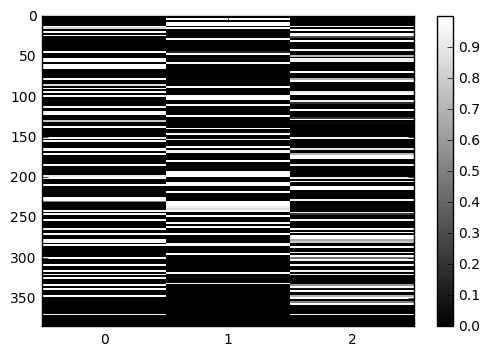

In [56]:
plt.imshow(top_output, interpolation='none',extent=[0,3,385,0],cmap='gray')
plt.axis('tight')
plt.colorbar()
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([array([ 121.,    0.,    0.,    0.,    1.,    0.,    0.,    1.,    2.,   45.]),
  array([ 128.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,   40.]),
  array([ 114.,    1.,    2.,    1.,    2.,    1.,    1.,    5.,    1.,   42.])],
 array([  5.29140201e-32,   9.99950349e-02,   1.99990070e-01,
          2.99985105e-01,   3.99980140e-01,   4.99975175e-01,
          5.99970210e-01,   6.99965245e-01,   7.99960279e-01,
          8.99955314e-01,   9.99950349e-01]),
 <a list of 3 Lists of Patches objects>)

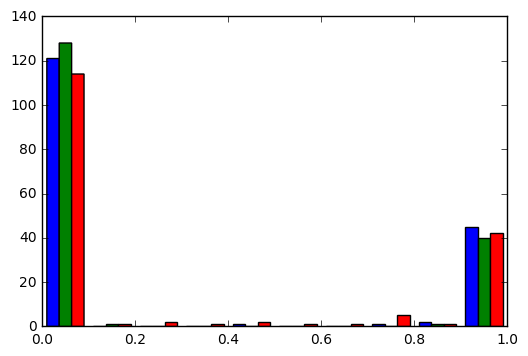

In [57]:
plt.hist(top_output)

In [58]:
code = (top_output[:,0:3] > 0.5) * np.ones_like(top_output[:,0:3])

In [59]:
from utils import find_unique_classes
U = find_unique_classes(code)
cl = U[0]

(array([ 61.,  28.,  33.,  18.,  22.,   8.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Patch objects>)

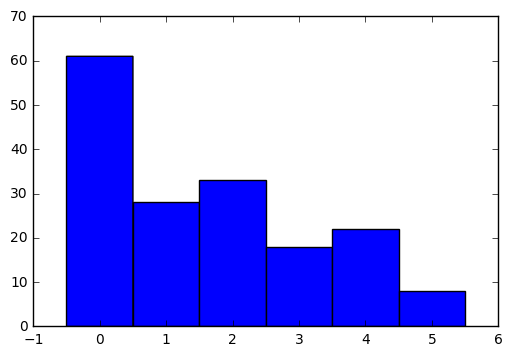

In [60]:
max_cl = np.max(cl)
plt.hist(cl,bins=np.arange(-0.5,max_cl + 1.5,1))

Check Survival curves for the different classes
===============================================

In [61]:
import csv
import gzip
id=[]
filename='../data/'+datafiles['ME']
if filename.endswith('.gz'):
    openfun=gzip.open
else:
    openfun=open
with openfun(filename) as f:
    my_csv = csv.reader(f,delimiter='\t')
    id = my_csv.next()

In [62]:
stat={}
with open('../data/AML/AML_clinical_data2.csv') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        patient_id=row[0]
        stat[patient_id]=(row[4],row[7],row[6])

In [63]:
import re
time_list = []
event_list = []
group_list = []
DEAD=1
ALIVE=0
print('The following case IDs were  not found in clinical data')
for index, key in enumerate(id[1:]):
    m = re.match('TCGA-\w+-\d+', key)
    patient_id = m.group(0)
    if patient_id in stat:
        patient_stat = stat[patient_id]
        add_group = True
        try:
            time_list.append(float(patient_stat[2]))
            event_list.append(DEAD)
        except ValueError:
            try:
                time_list.append(float(patient_stat[1]))
                event_list.append(ALIVE)
            except ValueError:
                print('No data for %s' % patient_id)
                add_group = False
        if add_group:
            group_list.append(cl[index])
    else:
        print(patient_id)

The following case IDs were  not found in clinical data
No data for TCGA-AB-2887
No data for TCGA-AB-2891
No data for TCGA-AB-2918
No data for TCGA-AB-2921
No data for TCGA-AB-2930
No data for TCGA-AB-2940
No data for TCGA-AB-2943
No data for TCGA-AB-2946
No data for TCGA-AB-2975


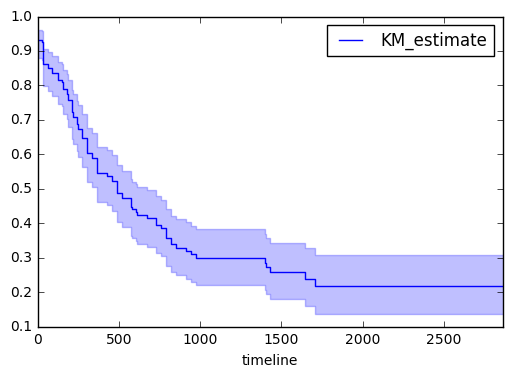

In [64]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(time_list,event_observed=event_list)
kmf.plot()

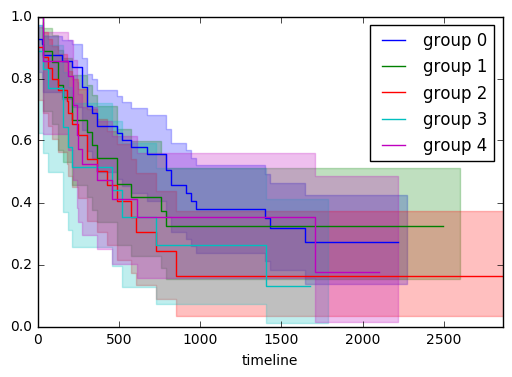

In [68]:
T=np.array(time_list)
E=np.array(event_list)
ix = (np.array(group_list) == 0)
kmf.fit(T[ix], E[ix], label='group 0')
ax=kmf.plot()
for i in [1,2,3,4]:
    ix=(np.array(group_list)==i)
    kmf.fit(T[ix], E[ix], label='group %d' % i)
    kmf.plot(ax=ax)